We are building a handwritten digits classifier in this image classification guided project. Let's get started! 

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import sqrt

In [2]:
data = load_digits()
#data
data.keys()

dict_keys(['data', 'DESCR', 'images', 'target_names', 'target'])

In [3]:
#len(data['images']) #there is one target name for each image

Images is in list of form numpy 2D arrays. We will transform it to a Pandas dataframe.

In [4]:
data['images'][0] #gives one image, a numpy 2D array out of the list. For all of data (i.i. without [0], it is a 3D array).
#shows us one image is an 8 x 8 (8rows and 8 columns, each pixel is a cell).

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

We need to flatten the 2D arrays so each image will become one row in the df. Each column will be a different pixel.

In [5]:
np.reshape(data['images'][0], 64) #now it is a 1D array

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
flat_data = np.reshape(data['images'], (len(data['images']), 64)) #taking all images in data and reshaping into similar 1D arrays that are 64 in length
flat_data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
flat_data[0] #confirms each 2D array is now length 64 1D array. It's becomee a list of 1D array

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
data['images'] = flat_data

In [9]:
image_df = pd.DataFrame(data=flat_data)

/dataquest/system/env/python3/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning:

matplotlib is currently using a non-GUI backend, so cannot show the figure



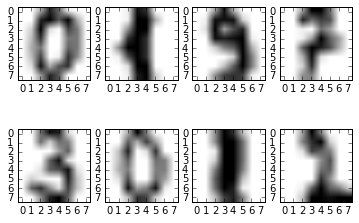

In [10]:
%matplotlib inline
## prepare image and figure
fig, axes = plt.subplots(2, 4)


axes[0,0].imshow(image_df.iloc[0].values.reshape(8,8), cmap='gray_r')  
#.values makes it a numpy array instead of a series
#8,8 bc 8 pixels per row and 8 columns
#. allows access to imshow method
axes[0,1].imshow(image_df.iloc[99].values.reshape(8,8), cmap='gray_r')  
axes[0,2].imshow(image_df.iloc[199].values.reshape(8,8), cmap='gray_r')  
axes[0,3].imshow(image_df.iloc[299].values.reshape(8,8), cmap='gray_r')  
axes[1,0].imshow(image_df.iloc[999].values.reshape(8,8), cmap='gray_r')  
axes[1,1].imshow(image_df.iloc[1099].values.reshape(8,8), cmap='gray_r')  
axes[1,2].imshow(image_df.iloc[1199].values.reshape(8,8), cmap='gray_r')  
axes[1,3].imshow(image_df.iloc[1299].values.reshape(8,8), cmap='gray_r')  
fig.show()





In [11]:

labels = pd.Series(data['target'])
labels

0       0
1       1
2       2
3       3
4       4
5       5
6       6
7       7
8       8
9       9
10      0
11      1
12      2
13      3
14      4
15      5
16      6
17      7
18      8
19      9
20      0
21      1
22      2
23      3
24      4
25      5
26      6
27      7
28      8
29      9
       ..
1767    4
1768    0
1769    5
1770    3
1771    6
1772    9
1773    6
1774    1
1775    7
1776    5
1777    4
1778    4
1779    7
1780    2
1781    8
1782    2
1783    2
1784    5
1785    7
1786    9
1787    5
1788    4
1789    8
1790    8
1791    4
1792    9
1793    0
1794    8
1795    9
1796    8
Length: 1797, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_df, labels,test_size=0.2)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
def train(x_train, y_train, k):
    knn = KNeighborsClassifier(k)
    knn.fit(x_train, y_train)
    return knn
    
def test(knn, x_test):
    features_predictions = knn.predict(x_test) #put in x, what using to predict model
    return features_predictions

In [14]:
length = len(image_df)*0.2
test_length = 359


In [15]:

def cross_validate(k):
    trained_models = []
    for fold in range (0, 4):
        #print(fold)
        x_test = image_df.iloc[fold*test_length:(fold+1)*test_length]
        #print(x_test.index)
        not_test = [i for i in image_df.index if i not in x_test.index]
        x_train = image_df.iloc[not_test] #everything not index of x_test
        y_test = labels.iloc[fold*test_length:(fold+1)*test_length]
        not_test = [i for i in labels.index if i not in y_test.index]
        y_train = labels.iloc[not_test] #everything not y_test rows
        fit_knn = train(x_train, y_train, k)
        accuracy = fit_knn.score(x_test, y_test)#inputting into trained model and gives predictions based on trained model, 
        #gives predictions based on x_test input and those will be compared to y_test(the ground truth)
        trained_models.append(accuracy)
    mean_accuracy = np.mean(trained_models)
    stddev_accuracy = np.std(trained_models)
    return mean_accuracy, stddev_accuracy

In [16]:
k_vals = pd.DataFrame()
for k in range(1,20):
    mean_acc, stddev_acc = cross_validate(k)
    k_vals.loc[k,'mean_accuracy'] = mean_acc
    k_vals.loc[k, 'stddev_accuracy'] = stddev_acc

In [17]:
k_vals['minus_stddev'] = k_vals['mean_accuracy'] - k_vals['stddev_accuracy']
k_vals['plus_stddev'] = k_vals['mean_accuracy'] + k_vals['stddev_accuracy']

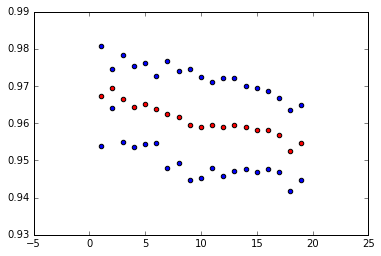

In [18]:
plt.scatter(k_vals.index, k_vals['mean_accuracy'], c='red')
plt.scatter(k_vals.index, k_vals['minus_stddev'])
plt.scatter(k_vals.index, k_vals['plus_stddev'])
plt.show()

In [19]:
k_vals = pd.DataFrame()
for k in range(1,20):
    knn = KNeighborsClassifier(k)
    k_cval = cross_val_score(knn,image_df,labels, cv=4)#gives accuracy for each fold
    k_vals.loc[k,'mean_accuracy'] = np.mean(k_cval)
    k_vals.loc[k, 'stddev_accuracy'] = np.std(k_cval)

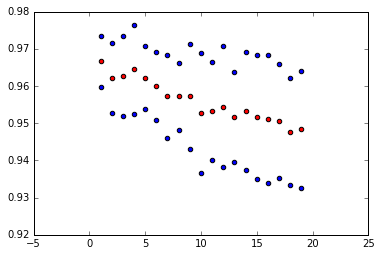

In [20]:
k_vals['minus_stddev'] = k_vals['mean_accuracy'] - k_vals['stddev_accuracy']
k_vals['plus_stddev'] = k_vals['mean_accuracy'] + k_vals['stddev_accuracy']
plt.scatter(k_vals.index, k_vals['mean_accuracy'], c='red')
plt.scatter(k_vals.index, k_vals['minus_stddev'])
plt.scatter(k_vals.index, k_vals['plus_stddev'])
plt.show()

We did this manually and using the cross_val_score method. The data is clustering naturally. Cross validation is used to compare different k values. By doing so, we get idea of how tightly clustered and mixed is the data. Data is naturally going to different locations based on features. Ex k=1 gives very accurate results which means the clusters are mostly the same label and the clusters are separate and distinct (low mixing). 

In [31]:
from sklearn.neighbors import KNeighborsClassifier
def train(x_train, y_train, layers):
    mlp = MLPClassifier(hidden_layer_sizes=layers)#each element in tuple is a layer and n reps number of neurons
    mlp.fit(x_train, y_train)
    return mlp
    
def test(mlp, x_test):
    features_predictions = mlp.predict(x_test) #put in x, what using to predict model
    return features_predictions
def cross_validate(layers,cv=4):
    test_trained_scores = []
    train_trained_scores = []
    for fold in range(0,cv):
        #print(fold)
        x_test = image_df.iloc[fold*test_length:(fold+1)*test_length]
        #print(x_test.index)
        not_test = [i for i in image_df.index if i not in x_test.index]
        x_train = image_df.iloc[not_test] #everything not index of x_test
        y_test = labels.iloc[fold*test_length:(fold+1)*test_length]
        not_test = [i for i in labels.index if i not in y_test.index]
        y_train = labels.iloc[not_test] #everything not y_test rows
        fit_mlp = train(x_train, y_train, n)
        train_accuracy = fit_mlp.score(x_train, y_train)
        accuracy = fit_mlp.score(x_test, y_test)#inputting into trained model and gives predictions based on trained model, 
        #gives predictions based on x_test input and those will be compared to y_test(the ground truth)
        test_trained_scores.append(accuracy)
        train_trained_scores.append(train_accuracy)
    test_mean_accuracy = np.mean(test_trained_scores)
    test_stddev_accuracy = np.std(test_trained_scores)
    train_mean_accuracy = np.mean(train_trained_scores)
    train_stddev_accuracy = np.std(train_trained_scores)
    return test_mean_accuracy, test_stddev_accuracy, train_mean_accuracy, train_stddev_accuracy

In [22]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
neurons = [8, 16, 32, 64, 128, 256]
m_vals = pd.DataFrame()
for n in neurons :
    print(n)
    layer = (n)
    (test_mean_acc, test_stddev_acc,
     train_mean_acc, train_stddev_acc) = cross_validate(layer)
    m_vals.loc[n,'test_mean_accuracy'] = test_mean_acc
    m_vals.loc[n, 'test_stddev_accuracy'] = test_stddev_acc
    m_vals.loc[n,'train_mean_accuracy'] = train_mean_acc
    m_vals.loc[n, 'train_stddev_accuracy'] = train_stddev_acc

8


/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



16
32
64
128
256


In [24]:
m_vals

,test_mean_accuracy,test_stddev_accuracy,train_mean_accuracy,train_stddev_accuracy
8,0.903203,0.031166,0.968707,0.007602
16,0.923398,0.017340,0.996175,0.002226
32,0.932451,0.031783,0.999652,0.000348
64,0.937326,0.024640,1.000000,0.000000
128,0.936630,0.024631,1.000000,0.000000
256,0.955432,0.018372,1.000000,0.000000


Overfitting has started by 32 neurons (and possibly 16) because this gives accuracy of 1. It's rare to be able to predict unfit data with accuracy of 1. Here variance is increased dramatically with increasing number of neurons. Hence model can tweak parameters to predict training data accurately.

In [29]:
layer = (64,64)
(test_mean_acc, test_stddev_acc,
 train_mean_acc, train_stddev_acc) = cross_validate(layer)
m_vals.loc['2x64','test_mean_accuracy'] = test_mean_acc
m_vals.loc['2x64', 'test_stddev_accuracy'] = test_stddev_acc
m_vals.loc['2x64','train_mean_accuracy'] = train_mean_acc
m_vals.loc['2x64', 'train_stddev_accuracy'] = train_stddev_acc
m_vals

,test_mean_accuracy,test_stddev_accuracy,train_mean_accuracy,train_stddev_accuracy
8,0.903203,0.031166,0.968707,0.007602
16,0.923398,0.017340,0.996175,0.002226
32,0.932451,0.031783,0.999652,0.000348
64,0.945682,0.017340,1.000000,0.000000
128,0.936630,0.024631,1.000000,0.000000
256,0.955432,0.018372,1.000000,0.000000
2x64,0.955432,0.010235,1.000000,0.000000


Overfitting is occurring. 

In [30]:
m_vals.sort_values('test_mean_accuracy',ascending=False)

,test_mean_accuracy,test_stddev_accuracy,train_mean_accuracy,train_stddev_accuracy
256,0.955432,0.018372,1.000000,0.000000
2x64,0.955432,0.010235,1.000000,0.000000
64,0.945682,0.017340,1.000000,0.000000
128,0.936630,0.024631,1.000000,0.000000
32,0.932451,0.031783,0.999652,0.000348
16,0.923398,0.017340,0.996175,0.002226
8,0.903203,0.031166,0.968707,0.007602


The models with 8 and 16 neurons are the best. 16 may be overfitting as it is almost 1 as well. May need to change model and further experiment.

In [35]:
n_tuples=[(10,10,10),(64,64,64),(128,128,128)]
for layer in n_tuples :
    (test_mean_acc, test_stddev_acc,
     train_mean_acc, train_stddev_acc) = cross_validate(layer,6)
    m_vals.loc[str(layer),'test_mean_accuracy'] = test_mean_acc
    m_vals.loc[str(layer), 'test_stddev_accuracy'] = test_stddev_acc
    m_vals.loc[str(layer),'train_mean_accuracy'] = train_mean_acc
    m_vals.loc[str(layer), 'train_stddev_accuracy'] = train_stddev_acc
  

In [36]:
  m_vals

,test_mean_accuracy,test_stddev_accuracy,train_mean_accuracy,train_stddev_accuracy
8,0.903203,0.031166,0.968707,0.007602
16,0.923398,0.017340,0.996175,0.002226
32,0.932451,0.031783,0.999652,0.000348
64,0.945682,0.017340,1.000000,0.000000
128,0.936630,0.024631,1.000000,0.000000
256,0.955432,0.018372,1.000000,0.000000
2x64,0.955432,0.010235,1.000000,0.000000
"(10, 10, 10)",0.957289,0.022148,1.000000,0.000000
"(64, 64, 64)",0.954968,0.028787,1.000000,0.000000
"(128, 128, 128)",0.954503,0.030159,1.000000,0.000000


In [37]:
m_vals.sort_values('test_mean_accuracy',ascending=False)

,test_mean_accuracy,test_stddev_accuracy,train_mean_accuracy,train_stddev_accuracy
"(10, 10, 10)",0.957289,0.022148,1.000000,0.000000
256,0.955432,0.018372,1.000000,0.000000
2x64,0.955432,0.010235,1.000000,0.000000
"(64, 64, 64)",0.954968,0.028787,1.000000,0.000000
"(128, 128, 128)",0.954503,0.030159,1.000000,0.000000
64,0.945682,0.017340,1.000000,0.000000
128,0.936630,0.024631,1.000000,0.000000
32,0.932451,0.031783,0.999652,0.000348
16,0.923398,0.017340,0.996175,0.002226
8,0.903203,0.031166,0.968707,0.007602


Overfitting began possibly as early as the model with 16 neurons, and most certainly by 32 neurons. Models for which the accuracy is 1 are generally overfitting.